# **DATA CLEANING AND EDA**

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Mounting the df
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Housing Mini Project/regression_data.xls')
df

Mounted at /content/drive


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
# Exploring the types of data in the columns
print("Data types:")
print(df.dtypes)

print("Names of the columns:")
print(df.columns)

print("Data info:")
print(df.info)

Data types:
id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object
Names of the columns:
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      

In [5]:
# Fix the date column in case we need to use it in the future
df['date'] = pd.to_datetime(df['date'])

# Separate the date info in case we need it
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.drop('date', axis=1, inplace=True)
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month,day
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,221900,2014,10,13
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,538000,2014,12,9
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,180000,2015,2,25
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,604000,2014,12,9
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,510000,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,...,0,98103,47.6993,-122.346,1530,1509,360000,2014,5,21
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,...,0,98146,47.5107,-122.362,1830,7200,400000,2015,2,23
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,...,0,98144,47.5944,-122.299,1020,2007,402101,2014,6,23
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,...,0,98027,47.5345,-122.069,1410,1287,400000,2015,1,16


In [6]:
# Drop NaN and duplicates

duplicates = df.duplicated()
print("Duplicated:")
print(duplicates)

nan_values = df.isnull().sum()
print("\nValues NaN:")
print(nan_values)

df_cleaned = df.drop_duplicates().dropna()

duplicates_after_cleaning = df_cleaned.duplicated()
nan_values_after_cleaning = df_cleaned.isnull().sum()

print("\nAfter cleanning:")
print("Duplicated:")
print(duplicates_after_cleaning)

print("\nValues NaN:")
print(nan_values_after_cleaning)

Duplicated:
0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

Values NaN:
id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
year             0
month            0
day              0
dtype: int64

After cleanning:
Duplicated:
0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

Values NaN:
id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
flo

In [7]:
# Counting the amount of grades and conditions
print(df['grade'].value_counts())
print(df['condition'].value_counts())

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


# **PLOTS**

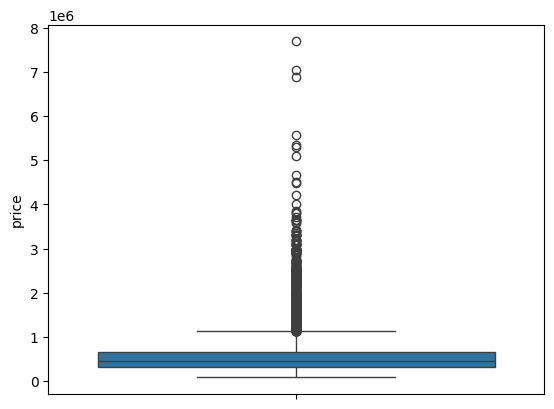

<ipython-input-8-833db59f432b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


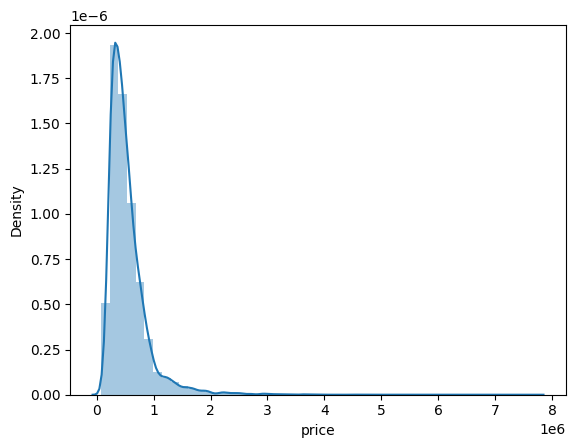

In [8]:
# Checking the distribution and box plot of the price
sns.boxplot(df['price'])
plt.show()

sns.distplot(df['price'])
plt.show()

<ipython-input-9-483fbb5526ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['condition'])


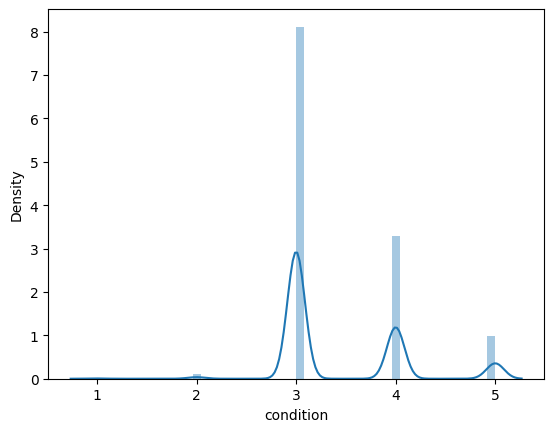

<ipython-input-9-483fbb5526ce>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['grade'])


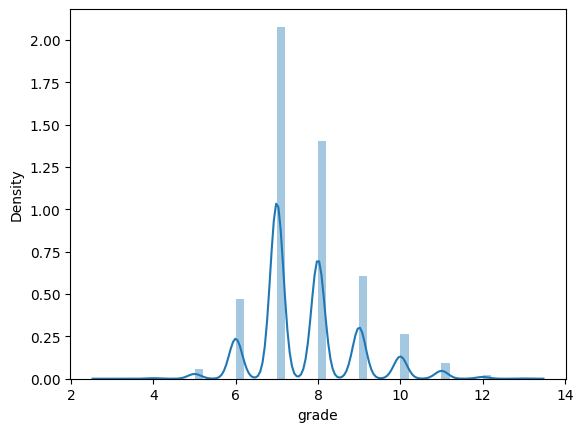

In [9]:
# Checking the distribution in the data of the condition and grade of the properties
sns.distplot(df['condition'])
plt.show()

sns.distplot(df['grade'])
plt.show()

Avobe 650k price: 5205
Bellow 650k price: 16275


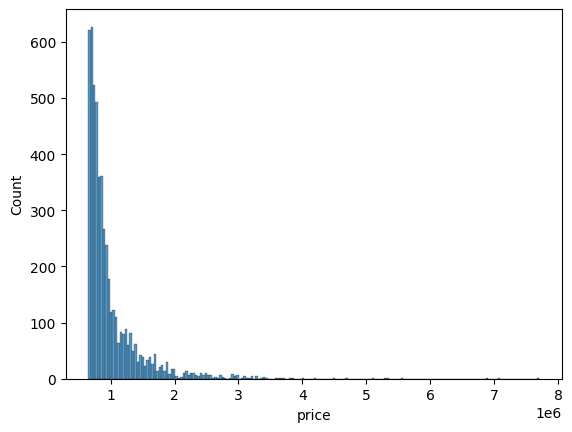

In [10]:
# Check the number of properties that are avobe 650K of price
sns.histplot(df[(df['price'] > 650000)]['price'])
print("Avobe 650k price:", len(df[(df['price'] > 650000)]))
print("Bellow 650k price:", len(df[df['price'] < 650000]))

Avobe 650k price: 5205
Bellow 650k price: 0


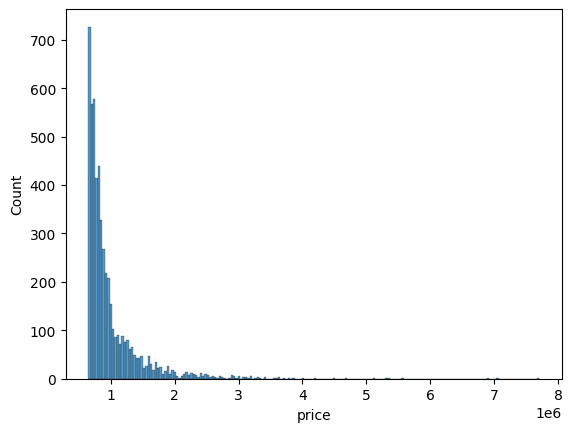

In [11]:
# Drop the properties bellow 650K price for our future training models
df_650 = df[df['price'] >= 650000]

# Checking if the price now its correct
sns.histplot(df_650['price'])
print("Avobe 650k price:", len(df_650[(df_650['price'] > 650000)]))
print("Bellow 650k price:", len(df_650[df_650['price'] < 650000]))

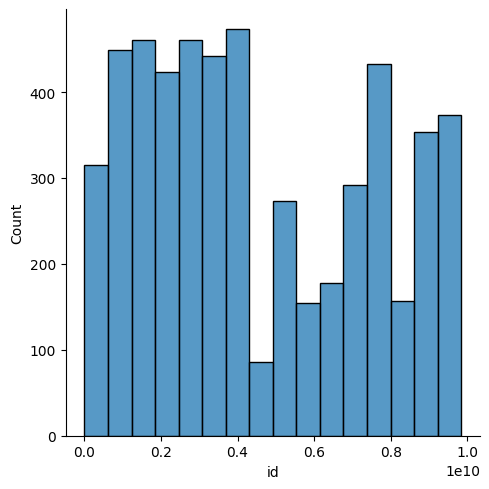

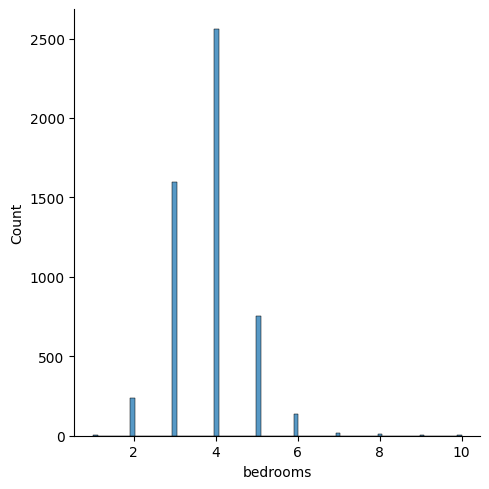

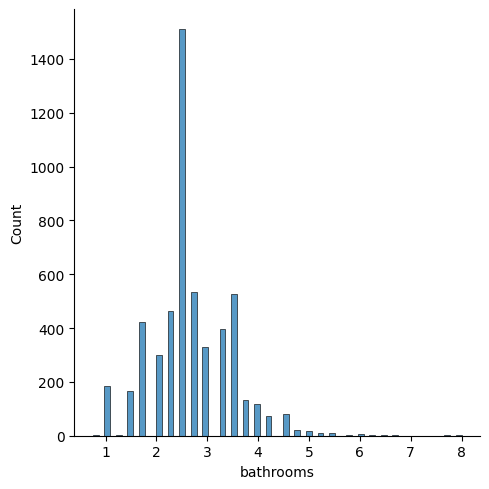

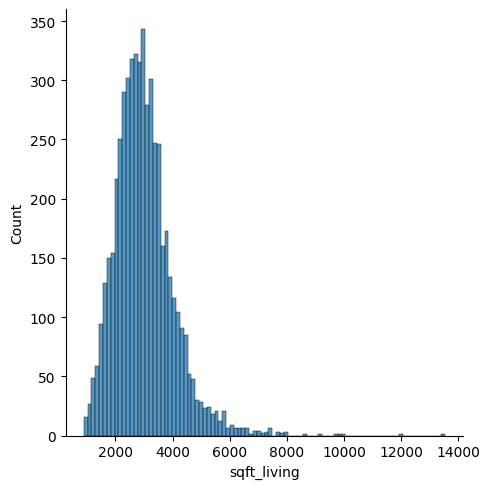

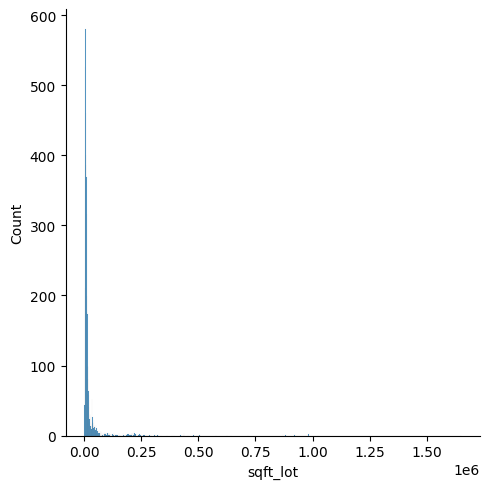

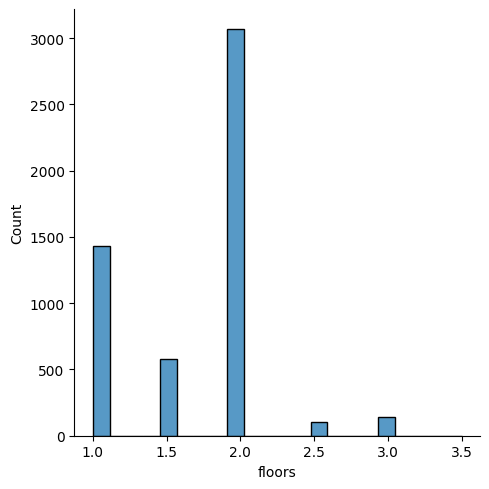

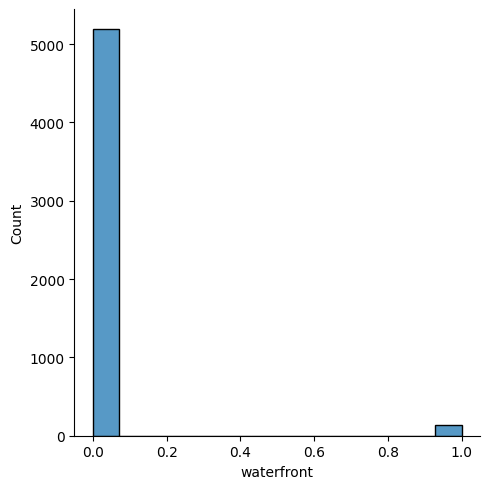

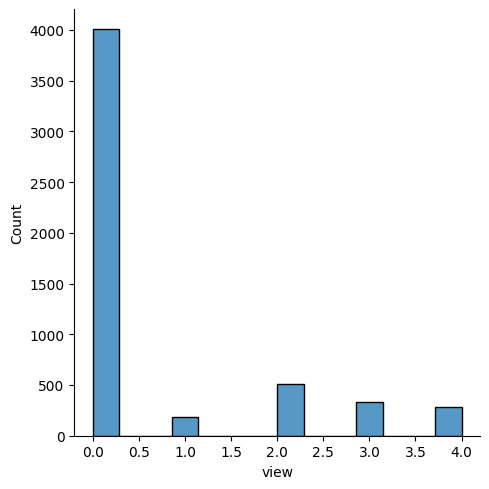

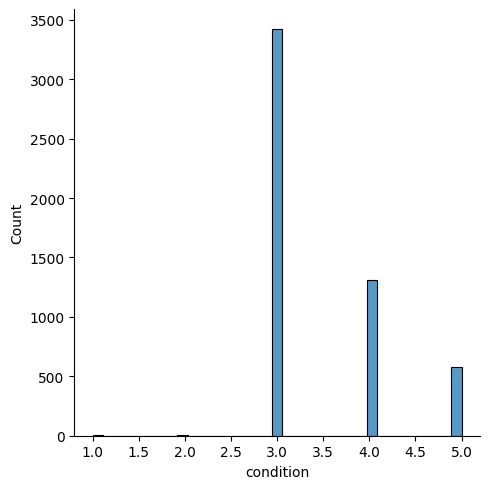

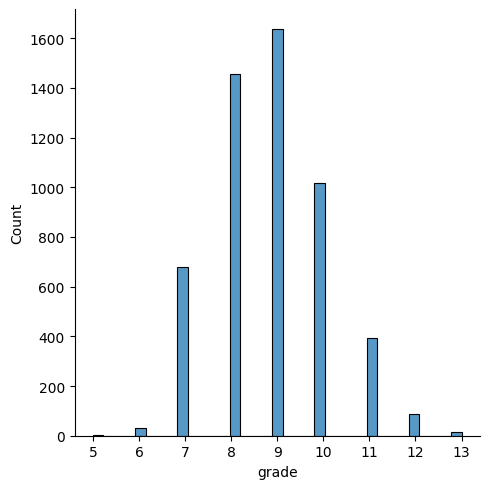

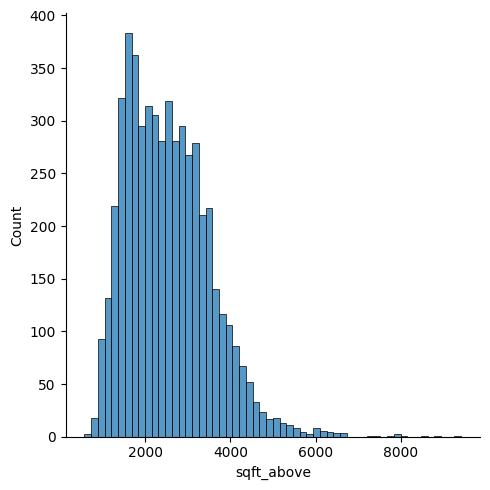

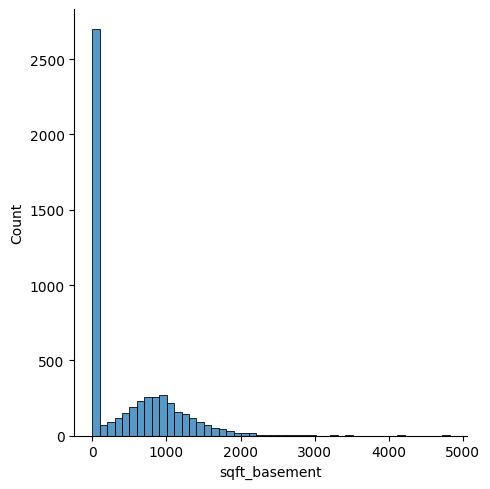

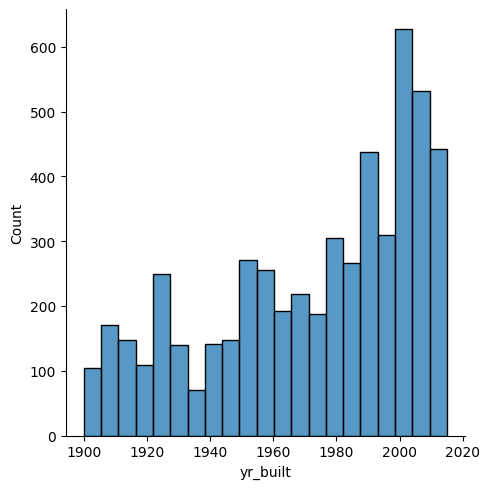

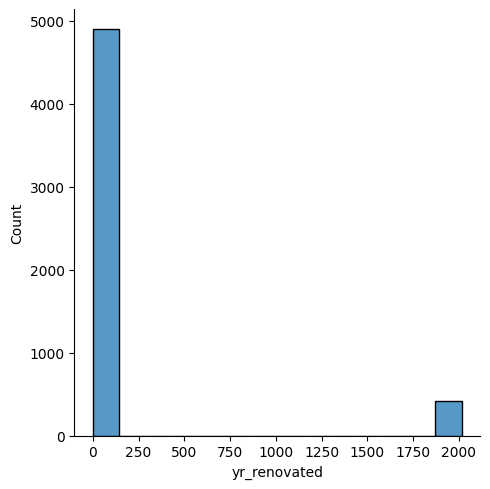

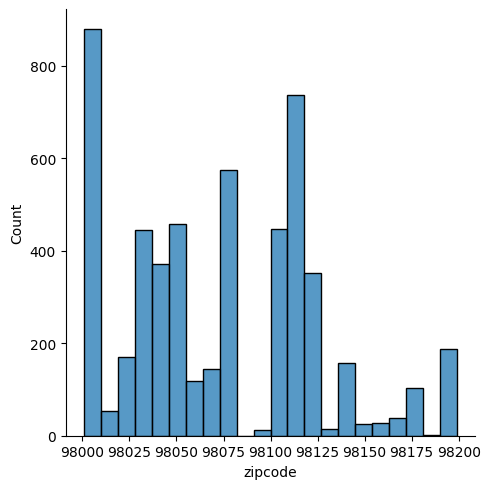

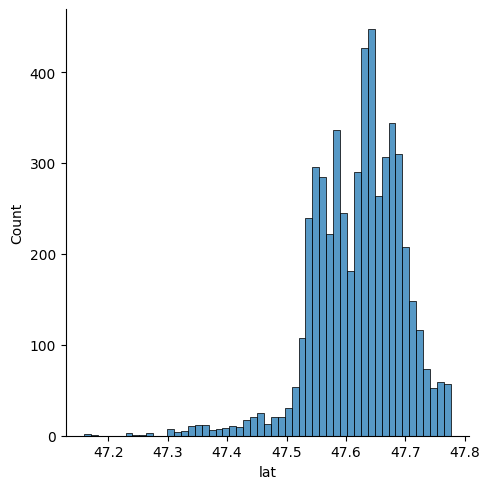

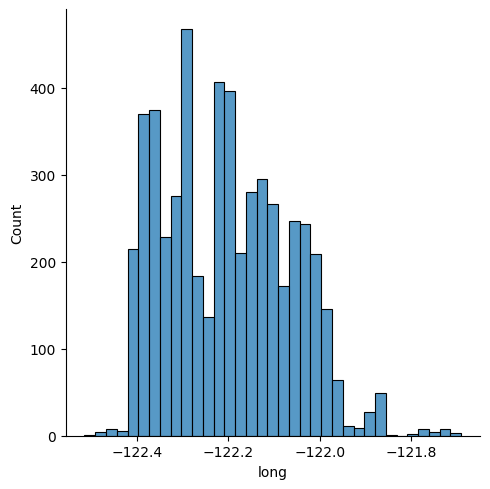

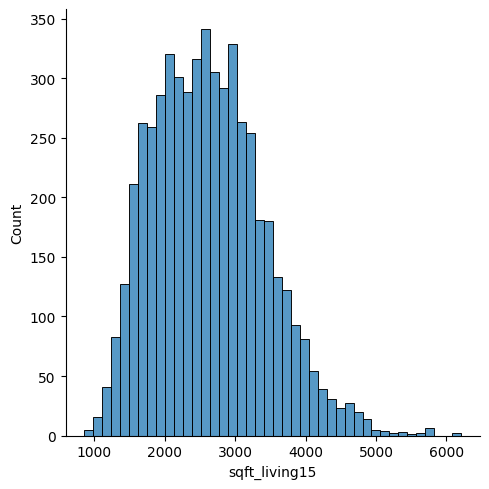

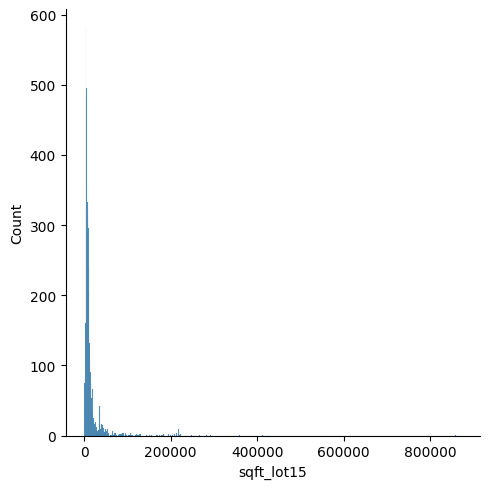

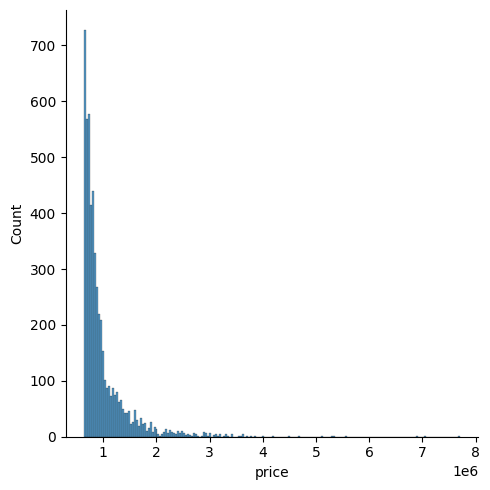

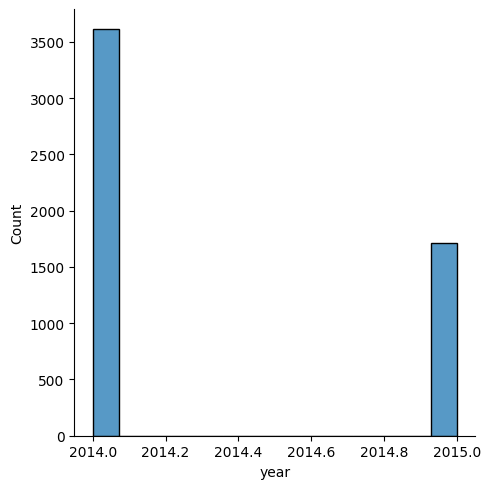

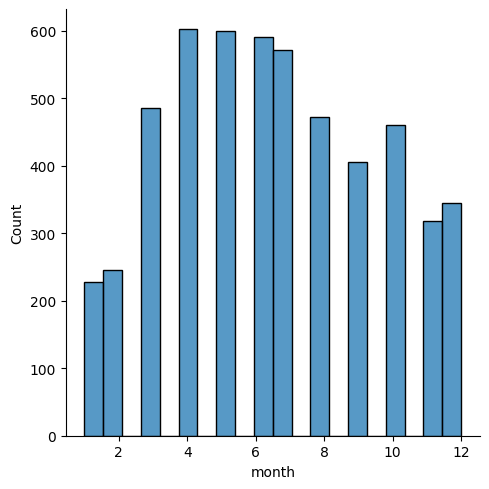

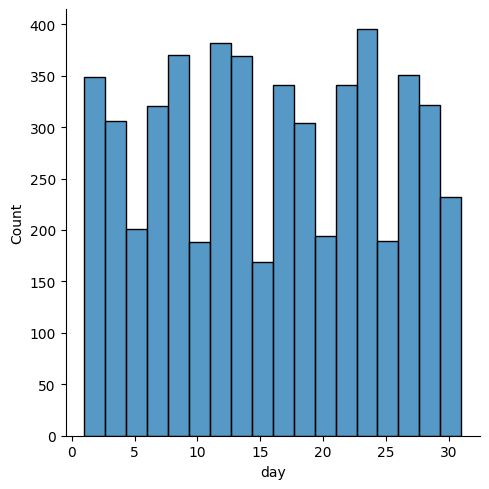

In [13]:
# Ploting all the columns of the data with significant insights
for col in df_650.select_dtypes(np.number):
    sns.displot(df_650[col])
    plt.show()

In [12]:
# Select only the numerical columns for scaling
numerical_columns = df_650.select_dtypes(include=['int64', 'float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical columns
df_scaled = df_650.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_650[numerical_columns])
df_scaled

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month,day
5,0.927718,0.195272,2.303757,2.348356,1.338993,-1.438209,-0.160714,-0.523898,-0.67294,1.754504,...,-0.293838,-0.401707,0.484688,1.461599,2.729029,2.437241,0.499924,-0.688057,-0.504985,-0.426076
10,-0.945447,-0.923389,-0.224526,0.539800,-0.190583,-1.438209,-0.160714,-0.523898,-0.67294,-0.691567,...,-0.293838,-1.297074,-0.256312,0.427090,-0.526294,-0.208207,-0.686961,1.453369,-0.833494,-1.461238
15,1.629123,0.195272,0.407544,-0.053329,-0.270205,0.579492,-0.160714,1.979709,-0.67294,0.123790,...,-0.293838,1.019202,-0.648212,-1.272461,-0.615655,-0.348295,-0.713103,1.453369,-1.819022,0.954139
21,-0.677366,-0.923389,0.091509,0.043906,0.391653,-1.438209,-0.160714,2.814245,-0.67294,0.123790,...,-0.293838,-0.654746,-1.180555,-0.223173,1.899241,0.116369,2.110323,-0.688057,0.480542,1.184175
26,-0.925799,-0.923389,-1.172633,-0.539500,-0.308538,0.579492,-0.160714,-0.523898,-0.67294,-0.691567,...,-0.293838,0.882951,0.250618,-1.161621,-1.100762,-0.360441,-0.112864,-0.688057,-0.176476,1.184175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,1.018043,1.313932,0.091509,0.578694,-0.196543,0.579492,-0.160714,-0.523898,-0.67294,0.123790,...,-0.293838,-0.284920,-1.841302,0.530541,1.184347,-0.194099,-0.650465,-0.688057,0.480542,-0.311058
21581,-1.471803,0.195272,0.723580,0.393949,-0.185122,0.579492,-0.160714,-0.523898,-0.67294,0.939147,...,-0.293838,-0.654746,-0.729802,-0.149280,-0.424166,-0.174074,1.231924,1.453369,-0.833494,0.609085
21583,0.915714,0.195272,0.407544,0.957907,-0.223089,0.579492,-0.160714,-0.523898,-0.67294,0.123790,...,-0.293838,-0.401707,0.880602,1.158635,0.954559,-0.268253,-0.378475,-0.688057,0.809051,-0.081023
21584,-1.452087,1.313932,1.355651,1.424631,-0.218939,0.579492,-0.160714,-0.523898,-0.67294,1.754504,...,-0.293838,-1.355468,0.163678,0.020675,0.201367,-0.207098,1.148267,-0.688057,1.137560,-0.081023


# **HEAT MAP**


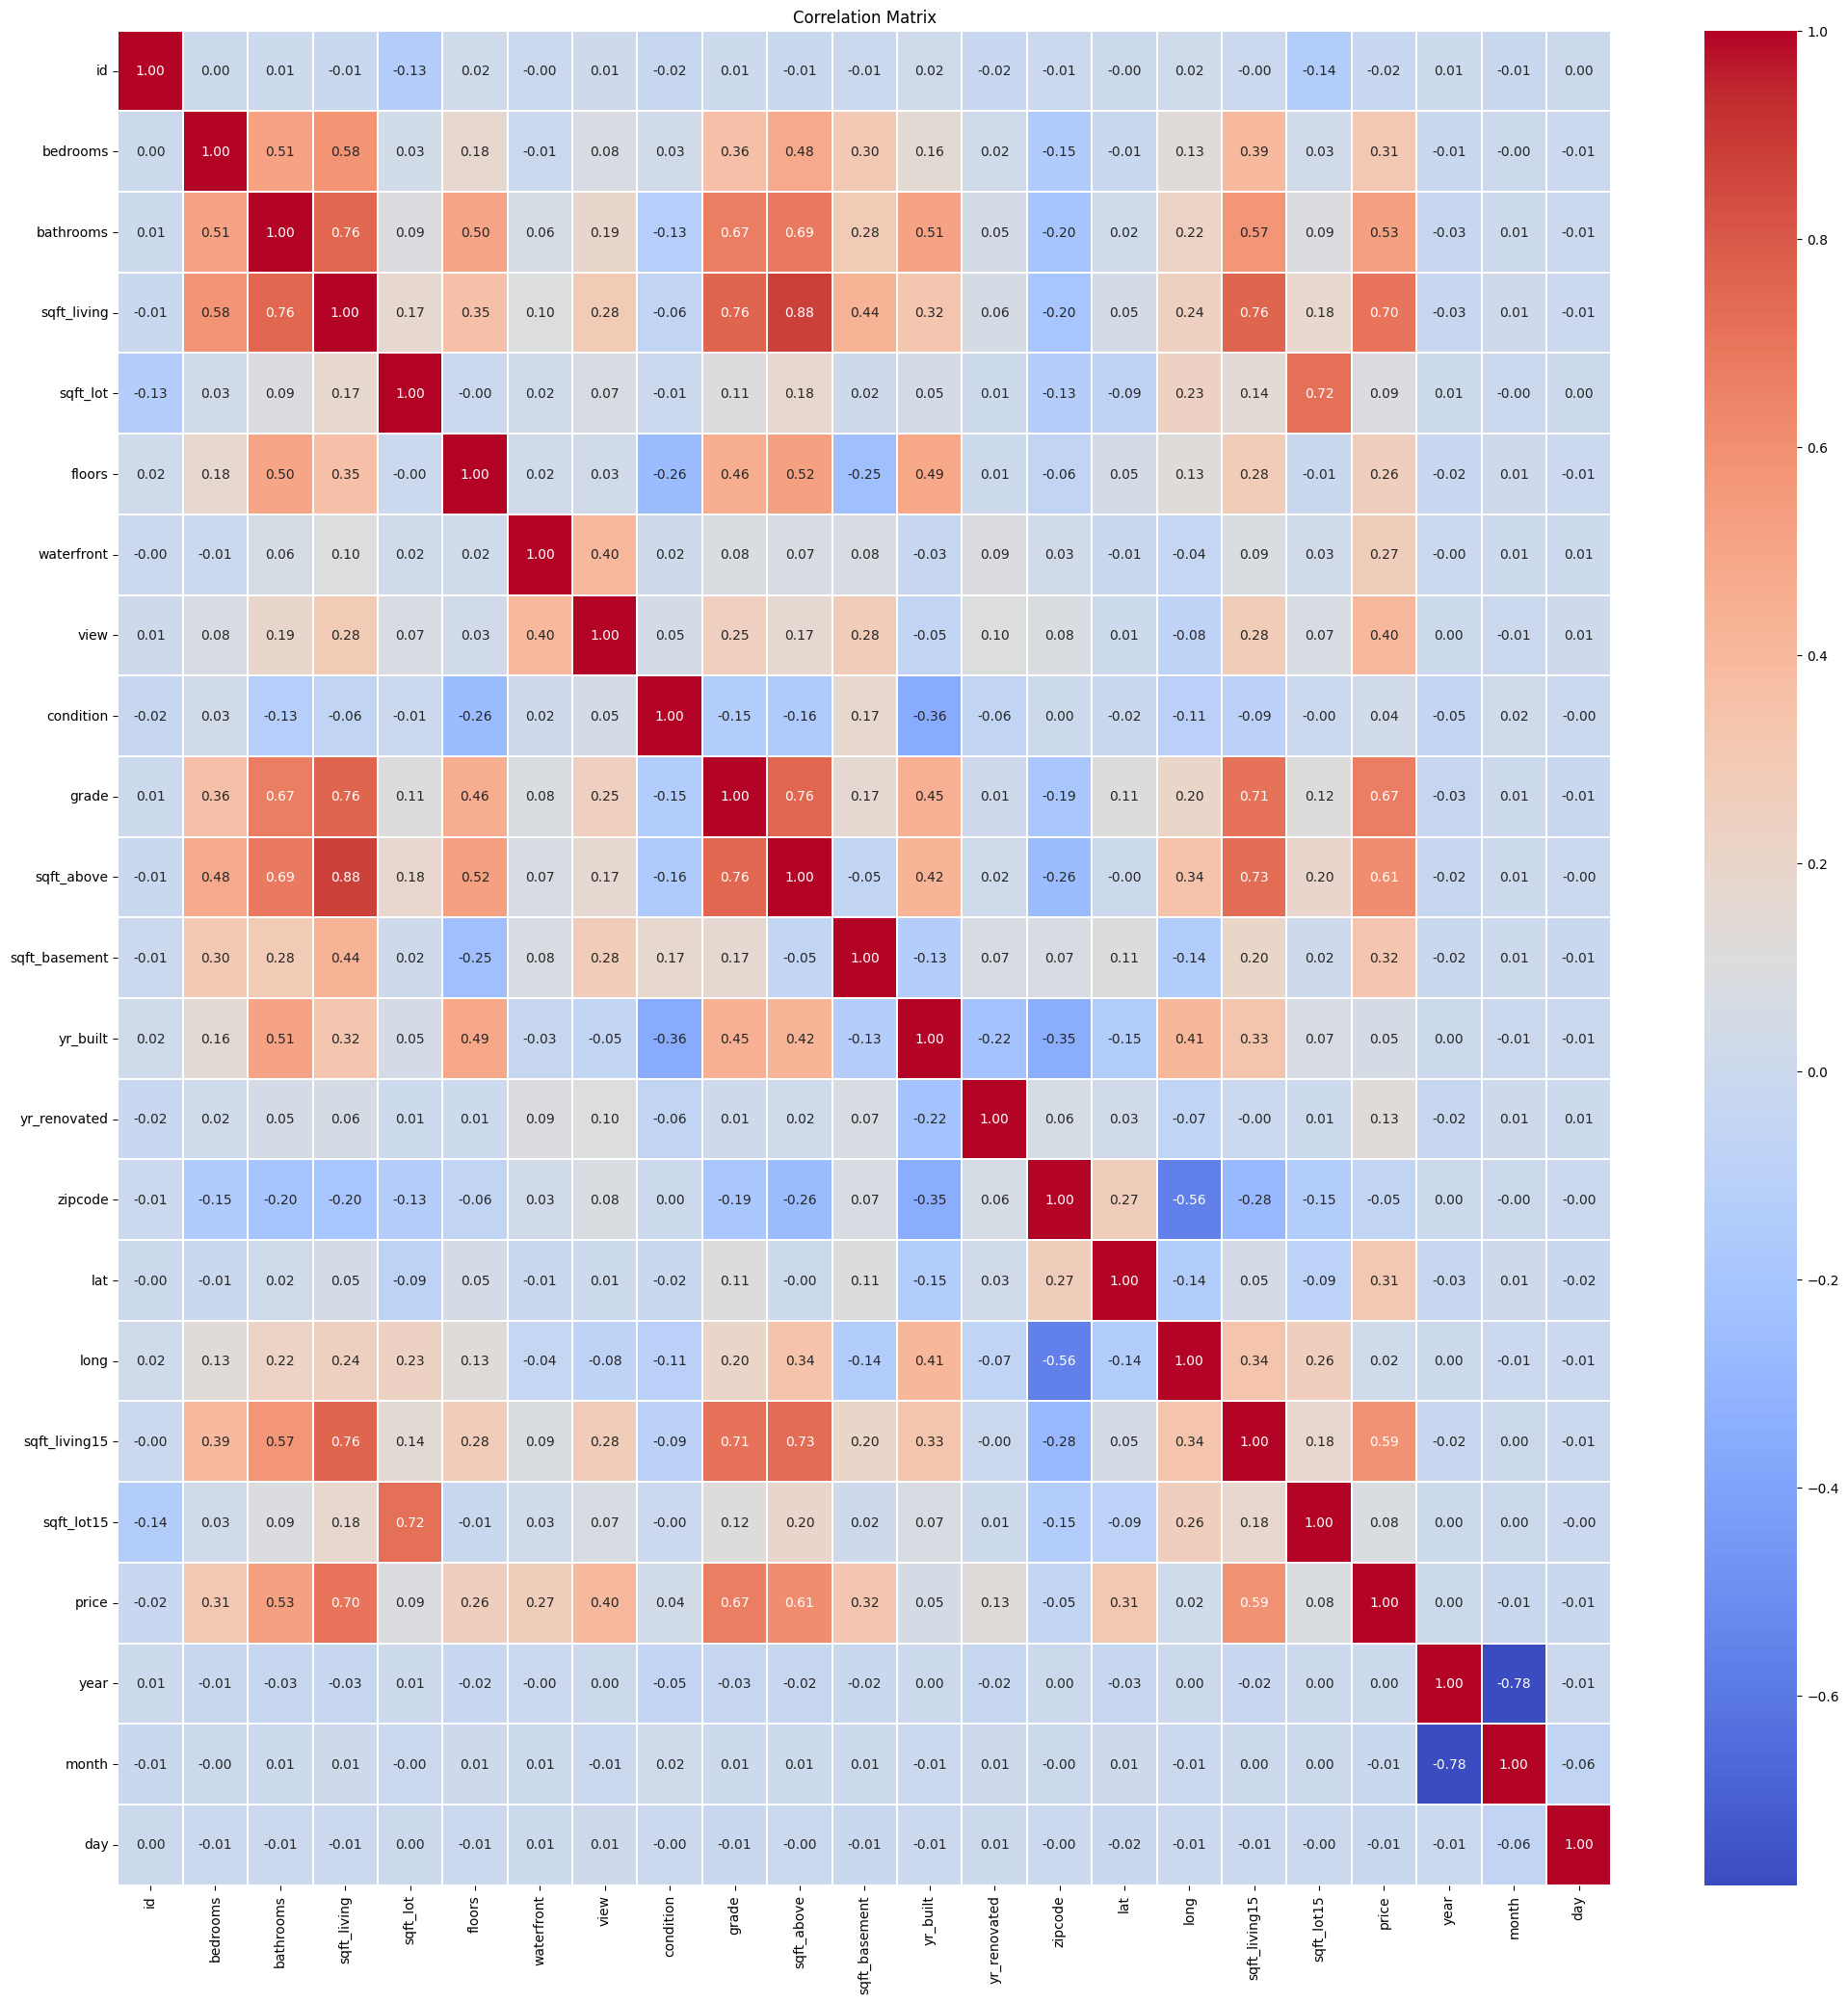

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Visualize the correlation
correlation_matrix = df.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.20)
plt.title('Correlation Matrix')
plt.show()

# **LINEAR REGRESSION**

In [15]:
# Sort the correlation in ascending order
df_650.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.606855
grade            0.507928
sqft_above       0.466493
bathrooms        0.465078
sqft_living15    0.373587
view             0.339441
waterfront       0.311090
sqft_basement    0.287238
bedrooms         0.202216
floors           0.126413
yr_renovated     0.107157
sqft_lot15       0.038203
sqft_lot         0.032130
yr_built         0.031285
year             0.008116
condition        0.004123
month           -0.002982
lat             -0.010257
day             -0.018388
id              -0.051263
long            -0.082348
zipcode         -0.083262
Name: price, dtype: float64

In [16]:
# Benchmark the data for future comparisions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = pd.get_dummies(df_650.drop(['grade', 'price', 'year', 'month', 'day'], axis=1))
y = df_650['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.5758211120572376
MAE: 210284.0656268006
RMSE: 314075.7441895564


Mean Squared Error (MSE): 167672959072.05914
R-squared (R2): 0.2789866882290657


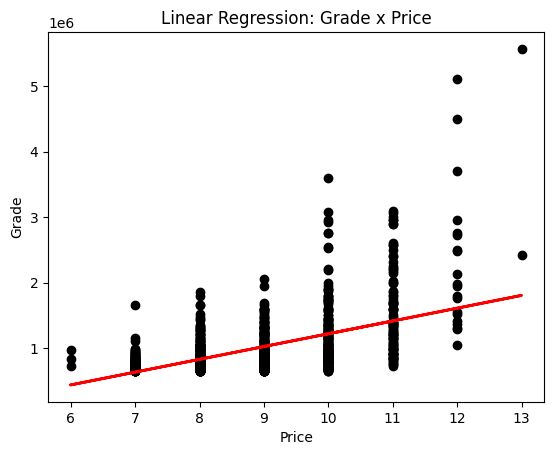

In [17]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(df_650[['grade']], df_650['price'], test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Visualize the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Grade x Price')
plt.xlabel('Price')
plt.ylabel('Grade')
plt.show()

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'year', 'month', 'day'],
      dtype='object')